In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks, peak_widths, find_peaks_cwt
from scipy.optimize import curve_fit
plt.rcParams['figure.figsize'] = [15, 10]


dataFile = '20sepccl4repeat01.txt'
print(dataFile[-5])

wavenumber, spectrum = np.loadtxt(dataFile, skiprows=1, dtype=float, usecols=(0, 1), delimiter=',', unpack=True)

1


In [2]:
" Interpolate the wavenumbers"
wavenumber_start = -1070
wavenumber_end = 1100
wavenumber_continuous = np.linspace(wavenumber_start, wavenumber_end, 4000)

In [3]:
spectrum = np.interp(wavenumber_continuous, wavenumber, spectrum)

# plt.plot(wavenumber_continuous, spectrum)

In [4]:
"""Add all the spectra and normalize"""

for i in ('20sepccl4repeat02.txt', '20sepccl4repeat03.txt', '20sepccl4repeat04.txt', '20sepccl4repeat05.txt', '20sepccl4repeat06.txt',
               '20sepccl4repeat07.txt'):
    temp_w , temp_s = np.loadtxt(i, skiprows=1, dtype=float, usecols=(0, 1), delimiter=',', unpack=True)

    spectrum += np.interp(wavenumber_continuous, temp_w, temp_s)
    

spectrum = (spectrum - np.min(spectrum)) / (np.max(spectrum) - np.min(spectrum))

noise = np.std(spectrum[:100])  # noise is the first 100

1 = Wavenumber:  -464.4186046511628 +- 20.878641155165422 or  10.14857739780744 	Height:  0.17907691493317685
2 = Wavenumber:  3.87596899224809 +- 12.569061134226429 or  6.806128366366843 	Height:  0.34615355052664276
3 = Wavenumber:  316.9767441860465 +- 11.06809132623186 or  5.46487901938005 	Height:  0.5173706691867658
4 = Wavenumber:  452.63565891472854 +- 17.396603772300054 or  9.509333994302391 	Height:  1.0
5 = Wavenumber:  785.2713178294573 +- 25.77234062850586 or  3.698144239684422 	Height:  0.19503180805190168


<>:39: SyntaxWarning: invalid escape sequence '\d'
<>:41: SyntaxWarning: invalid escape sequence '\d'
<>:39: SyntaxWarning: invalid escape sequence '\d'
<>:41: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipykernel_45031/1048029400.py:39: SyntaxWarning: invalid escape sequence '\d'
  plt.annotate(f'rate = {1} A$\degree$/s', xy=(0.75, 0.92), xycoords='axes fraction', fontsize=14, verticalalignment='top')
/tmp/ipykernel_45031/1048029400.py:41: SyntaxWarning: invalid escape sequence '\d'
  plt.annotate(f'angle = {1}$\degree$', xy=(0.75, 0.82), xycoords='axes fraction', fontsize=14, verticalalignment='top')


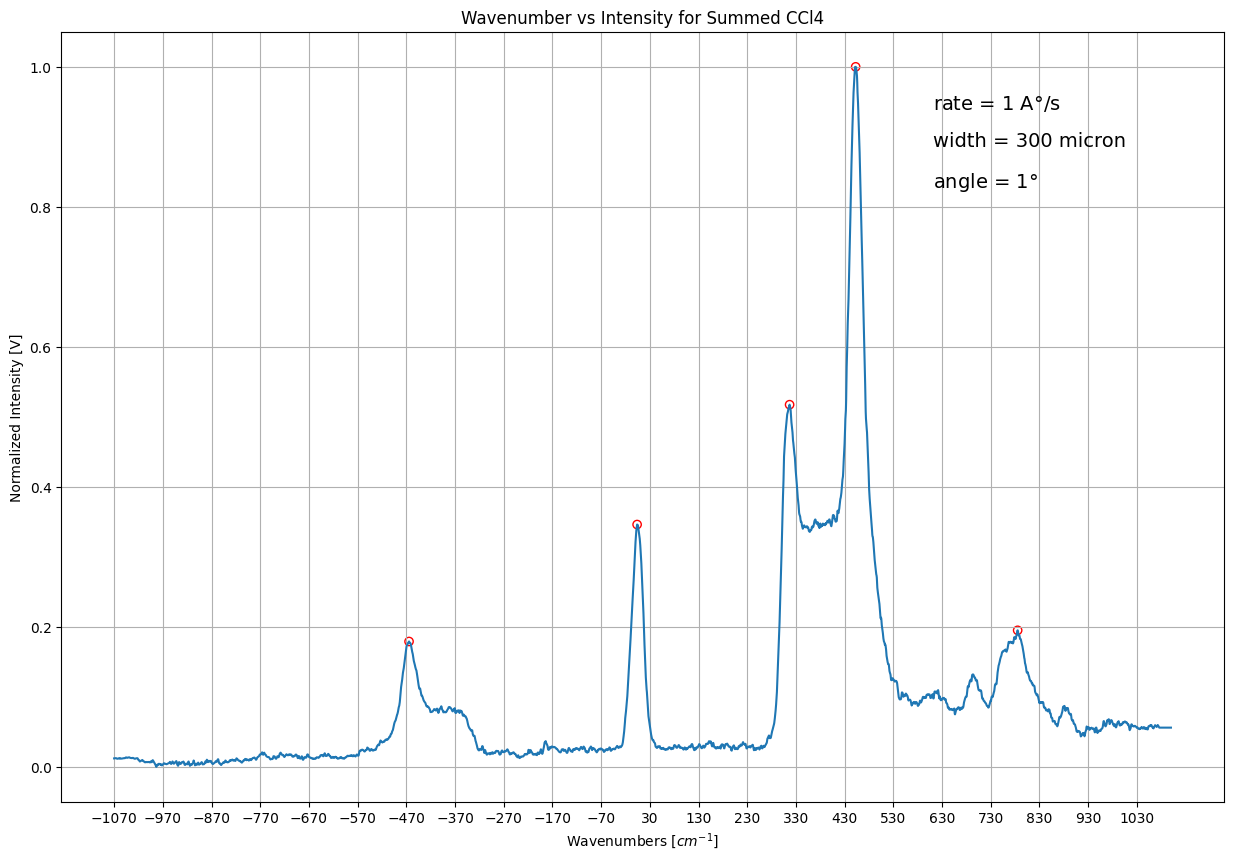

In [5]:
"""Find all the peaks"""

peaks, _ = find_peaks(spectrum, prominence=0.05, distance = 100)
# peaks = find_peaks_cwt(spectrum, widths=np.arange(10, 30))

peak_wavenumbers = wavenumber_continuous[peaks]
 
# peak_wavenumbers -= peak_wavenumbers[1]

# peak_wavenumbers -= peak_wavenumbers[0]
peak_spectrum = spectrum[peaks]

widths = peak_widths(spectrum, peaks, rel_height=0.5)
widthsLower = peak_widths(spectrum, peaks, rel_height=0.05)
# print(widths[0])

spacing = wavenumber_continuous[1] - wavenumber_continuous[0]
wavenumber_width = widths[0] * spacing
wavenumber_width_lower = widthsLower[0] * spacing

# Additional uncertainity
wavenumber_uncertainty = wavenumber_width/(2*np.sqrt(2*np.log(2)))  # this is now the standard deviation
wavenumber_uncertainty = np.sqrt(wavenumber_uncertainty**2 + 1**2 + 1**2 + 3.87596899224809**2)

for i in range(len(peak_wavenumbers)):
    print(i+1, "=", "Wavenumber: ", peak_wavenumbers[i], "+-", wavenumber_uncertainty[i], 'or ', wavenumber_width_lower[i], "\tHeight: ", peak_spectrum[i])

"""Plot the data"""

plt.plot(wavenumber_continuous, spectrum)
plt.scatter(peak_wavenumbers, peak_spectrum, color='red', facecolors='none')
plt.xticks(np.arange(wavenumber_continuous[0], wavenumber_continuous[-1], 100))
plt.grid()

plt.xlabel("Wavenumbers $[cm^{-1}]$")
plt.ylabel("Normalized Intensity [V]")

plt.title(f"Wavenumber vs Intensity for Summed CCl4")
plt.annotate(f'rate = {1} A$\degree$/s', xy=(0.75, 0.92), xycoords='axes fraction', fontsize=14, verticalalignment='top')
plt.annotate(f'width = {300} micron', xy=(0.75, 0.87), xycoords='axes fraction', fontsize=14, verticalalignment='top')
plt.annotate(f'angle = {1}$\degree$', xy=(0.75, 0.82), xycoords='axes fraction', fontsize=14, verticalalignment='top')
# plt.hlines(*widths[1:], color="C2")

plt.savefig("Summer CCl4.png")

In [6]:
# Define the limits for integration
x_value1 = 710
x_value2 = 850


# Find the indices that correspond to the integration limits
start_index = np.where(wavenumber_continuous >= x_value1)[0][0]
end_index = np.where(wavenumber_continuous <= x_value2)[0][-1]

# Integrate using the trapezoidal rule over the selected range
area = np.trapz(spectrum[start_index:end_index+1], wavenumber_continuous[start_index:end_index+1])

print(f"The area under the curve from x = {x_value1} to x = {x_value2} is: {area}")
print("Uncertainity: ", noise*np.sqrt(len(wavenumber_continuous[start_index:end_index+1])))

The area under the curve from x = 710 to x = 850 is: 18.251904381023643
Uncertainity:  0.018453244830628844


/tmp/ipykernel_45031/791906875.py:11: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  area = np.trapz(spectrum[start_index:end_index+1], wavenumber_continuous[start_index:end_index+1])
